In [ ]:
#import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas as pd

yahoo_financials = YahooFinancials('MCD')

data = yahoo_financials.get_historical_price_data(start_date='1991-01-01', 
                                                  end_date='2001-01-01', 
                                                  time_interval='weekly')

In [ ]:
mcdonald = pd.DataFrame(data["MCD"]['prices'])

In [ ]:
mcdonald

In [ ]:
yahoo_financials = YahooFinancials('MSFT')

data = yahoo_financials.get_historical_price_data(start_date='1991-01-01', 
                                                  end_date='2001-01-01', 
                                                  time_interval='weekly')
microsoft = pd.DataFrame(data["MSFT"]['prices'])

In [ ]:
microsoft

In [ ]:
yahoo_financials = YahooFinancials('KO')

data = yahoo_financials.get_historical_price_data(start_date='1991-01-01', 
                                                  end_date='2001-01-01', 
                                                  time_interval='weekly')
coca_cola = pd.DataFrame(data["KO"]['prices'])

In [ ]:
coca_cola

# 2.2

In [ ]:
import math

In [ ]:
abs(coca_cola.iloc[0, :]['open'] - coca_cola.iloc[-1, :]['open']) #difference in dollars

In [ ]:
abs(microsoft.iloc[0, :]['open'] - microsoft.iloc[-1, :]['open'])

In [ ]:
abs(mcdonald.iloc[0, :]['open'] - mcdonald.iloc[-1, :]['open'])

# 2.3

In [ ]:
#yearly returns
#abs(coca_cola.iloc[0, :]['open'] - coca_cola.iloc[-1, :]['open'])

In [ ]:
coca_cola_years = []
years = ['1991-01-01', '1992-01-07', '1993-01-05', '1994-01-04', '1995-01-03', '1996-01-02', '1997-01-07', '1998-01-06', '1999-01-05', '2000-01-04', '2000-12-26']
for i in range(len(coca_cola)):
    if coca_cola.iloc[i, :]['formatted_date'] in years:
        coca_cola_years.append(coca_cola.iloc[i, :]['open'])

In [ ]:
coca_cola_years

In [ ]:
microsoft_years = []
years = ['1991-01-01', '1992-01-07', '1993-01-05', '1994-01-04', '1995-01-03', '1996-01-02', '1997-01-07', '1998-01-06', '1999-01-05', '2000-01-04', '2000-12-26']
for i in range(len(microsoft)):
    if microsoft.iloc[i, :]['formatted_date'] in years:
        microsoft_years.append(microsoft.iloc[i, :]['open'])

In [ ]:
microsoft_years

In [ ]:
mcdonald_years = []
years = ['1991-01-01', '1992-01-07', '1993-01-05', '1994-01-04', '1995-01-03', '1996-01-02', '1997-01-07', '1998-01-06', '1999-01-05', '2000-01-04', '2000-12-26']
for i in range(len(mcdonald)):
    if mcdonald.iloc[i, :]['formatted_date'] in years:
        mcdonald_years.append(mcdonald.iloc[i, :]['open'])

In [ ]:
mcdonald_years

In [ ]:
import numpy as np
np.mean(coca_cola_years),np.mean(microsoft_years),np.mean(mcdonald_years)

In [ ]:
X = np.stack((coca_cola_years, microsoft_years, mcdonald_years ), axis=0)

In [ ]:
X

In [ ]:
np.cov(X)

# 2.4

In [ ]:
weights = np.round([*np.arange(0,1.1,0.1)], 1)
# kinda crappy but whatever
portfolio_weights = []
for a in weights:
    for b in weights:
        for c in weights:
            if a+b+c == 1:
                portfolio_weights.append([a, b, c])
print(portfolio_weights)

## 2.4.1

In [160]:
yearly_returns = []
means = []
standard_deviations = []

for weight in portfolio_weights:
    yearly_returns_of_portfolio = (X.T*weight).sum(axis=1)
    yearly_returns.append(yearly_returns_of_portfolio)
    means.append(np.mean(yearly_returns_of_portfolio))
    standard_deviations.append(np.std(yearly_returns_of_portfolio))

Text(0, 0.5, 'mean')

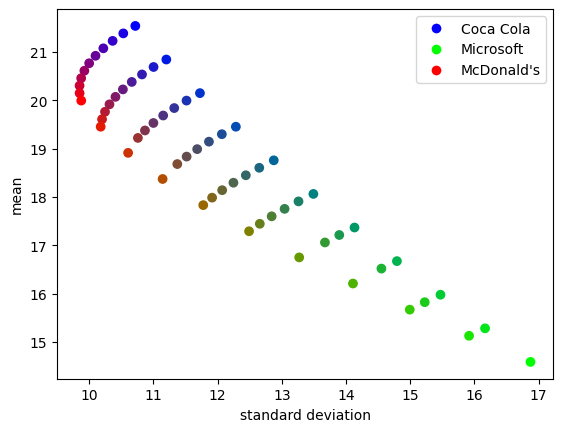

In [119]:
import matplotlib.pyplot as plt

def legend_element(label, color):
    return Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8)


plt.scatter(standard_deviations, means, color=portfolio_weights)
plt.legend(handles=[legend_element('Coca Cola', [0,0,1]), 
                    legend_element('Microsoft', [0,1,0]), 
                    legend_element("McDonald's", [1,0,0])])
plt.xlabel("standard deviation")
plt.ylabel("mean")

## 2.4.2

In [157]:
def weight_to_text(weight):
    return str(round(weight[0]*100)) + "% McDonald's, " + str(round(weight[1]*100)) + "% Microsoft, " + str(round(weight[2]*100)) + "% Cola Cola"

In [158]:
print("maximal mean: " + weight_to_text(portfolio_weights[means.index(max(means))]))

maximal mean: 0% McDonald's, 0% Microsoft, 100% Cola Cola


## 2.4.3

In [159]:
print("lowest standard deviation: " + weight_to_text(portfolio_weights[standard_deviations.index(min(standard_deviations))]))

lowest standard deviation: 80% McDonald's, 0% Microsoft, 20% Cola Cola


## 2.4.4

This portfolio is interesting because it maximizes returns and minimizes volatility

In [155]:
mean_stdev_ratio = [mean / standard_deviation for mean, standard_deviation in zip(means, standard_deviations)]

print("highest ratio of mean to standard deviation: " + weight_to_text(portfolio_weights[mean_stdev_ratio.index(max(mean_stdev_ratio))]))

highest ratio of mean to standard deviation: 60% Coca Cola, 0% Microsoft, 40% McDonald's
